In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
texas_df = pd.read_csv("resources/redfin_texas_counties.csv")

# Display sample data
texas_df.head()

,Unnamed: 0,period_begin,period_end,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,...,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,county
0,139,2012-01-01,2012-01-31,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,152500.0,0.155303,...,0.043478,-0.164855,-0.096307,0.400000,-0.400000,0.066667,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
1,299,2019-05-01,2019-05-31,"Williamson County, TX",Texas,TX,Condo/Co-op,3,237000.0,0.013904,...,0.212766,-0.187234,-0.103024,0.571429,-0.211180,0.071429,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
2,474,2019-06-01,2019-06-30,"Williamson County, TX",Texas,TX,Single Family Residential,6,291000.0,-0.029863,...,0.336561,0.040325,-0.032895,0.505759,-0.006931,0.056208,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
3,505,2012-04-01,2012-04-30,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,154950.0,0.029568,...,0.113636,-0.021499,-0.069462,0.571429,0.171429,0.428571,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
4,1400,2015-08-01,2015-08-31,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,219000.0,0.120205,...,NaN,NaN,NaN,0.777778,0.215278,0.777778,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County


In [3]:
#narrow down dataframe to include only relevant columns
clean_df = texas_df[['period_begin', 'period_end', 'region', 'property_type', 'median_sale_price', 'sold_above_list','median_dom']]

# ALL RESIDENTIAL Filter
clean_df = clean_df.loc[(clean_df['property_type'] == 'All Residential')]

#Creating a year column.  
clean_df['year'] = pd.DatetimeIndex(clean_df['period_end']).year

# Let's make sure 'date' is actually a date in pandas
clean_df["date"] = pd.to_datetime(clean_df["period_end"])

clean_df

,period_begin,period_end,region,property_type,median_sale_price,sold_above_list,median_dom,year,date
5,2018-12-01,2018-12-31,"Williamson County, TX",All Residential,275000.0,0.127148,58.0,2018,2018-12-31
9,2016-04-01,2016-04-30,"Bastrop County, TX",All Residential,213000.0,0.131148,27.0,2016,2016-04-30
15,2018-11-01,2018-11-30,"Caldwell County, TX",All Residential,177000.0,0.230769,52.0,2018,2018-11-30
16,2015-04-01,2015-04-30,"Caldwell County, TX",All Residential,170000.0,0.238095,139.0,2015,2015-04-30
25,2012-11-01,2012-11-30,"Williamson County, TX",All Residential,183060.0,0.141856,46.0,2012,2012-11-30
...,...,...,...,...,...,...,...,...,...
2561,2014-09-01,2014-09-30,"Travis County, TX",All Residential,274028.5,0.224964,21.0,2014,2014-09-30
2562,2021-07-01,2021-07-31,"Travis County, TX",All Residential,551250.0,0.691837,28.0,2021,2021-07-31
2563,2012-07-01,2012-07-31,"Hays County, TX",All Residential,202000.0,0.092166,54.0,2012,2012-07-31
2565,2012-12-01,2012-12-31,"Hays County, TX",All Residential,190000.0,0.098160,77.0,2012,2012-12-31


In [4]:
#Filter on #2018-2022
years = [2018, 2019, 2020, 2021, 2022]
clean_df = clean_df.loc[clean_df['year'].isin(years)]

clean_df = clean_df.sort_values('period_end')


clean_df['sold_above_list'] = clean_df['sold_above_list'] * 100
clean_df['sold_above_list'] = clean_df['sold_above_list'].round(2)

clean_df

,period_begin,period_end,region,property_type,median_sale_price,sold_above_list,median_dom,year,date
887,2018-01-01,2018-01-31,"Williamson County, TX",All Residential,266277.5,18.35,54.0,2018,2018-01-31
1990,2018-01-01,2018-01-31,"Hays County, TX",All Residential,262000.0,15.18,55.0,2018,2018-01-31
1473,2018-01-01,2018-01-31,"Bastrop County, TX",All Residential,272000.0,8.93,52.0,2018,2018-01-31
483,2018-01-01,2018-01-31,"Caldwell County, TX",All Residential,183000.0,4.35,45.0,2018,2018-01-31
1348,2018-01-01,2018-01-31,"Travis County, TX",All Residential,325505.0,13.94,45.0,2018,2018-01-31
...,...,...,...,...,...,...,...,...,...
651,2022-10-01,2022-10-31,"Williamson County, TX",All Residential,460000.0,16.00,52.0,2022,2022-10-31
1555,2022-10-01,2022-10-31,"Bastrop County, TX",All Residential,382641.5,20.59,42.0,2022,2022-10-31
2254,2022-10-01,2022-10-31,"Hays County, TX",All Residential,408000.0,18.39,47.0,2022,2022-10-31
1500,2022-10-01,2022-10-31,"Caldwell County, TX",All Residential,322587.5,12.50,32.0,2022,2022-10-31


---
## Sold above listing graphs

In [5]:
## this grap is give the sum of the percent sold above list price - so at the height it is giving over 300% because it is adding data from all 5 counties

#above = clean_df.groupby(['date'])['sold_above_list'].sum()
#above_df = pd.DataFrame(above)
#above_df.reset_index(inplace=True)
#above_df

#plt.plot(above_df['date'], above_df['sold_above_list'])
#plt.show()

In [6]:
#w = clean_df.loc[(clean_df['region'] == 'Williamson County, TX')]
#h=clean_df.loc[(clean_df['region'] == 'Hays County, TX')]
#b=clean_df.loc[(clean_df['region'] == 'Bastrop County, TX')]
#c=clean_df.loc[(clean_df['region'] == 'Caldwell County, TX')]
#t=clean_df.loc[(clean_df['region'] == 'Travis County, TX')]
#plt.plot(w['date'], w['sold_above_list'], label = 'Williamson County')
#plt.plot(h['date'], h['sold_above_list'], label = 'Hays County')
#plt.plot(b['date'], b['sold_above_list'], label = 'Bastrop County')
#plt.plot(c['date'], c['sold_above_list'], label = 'Caldwell County')
#plt.plot(t['date'], t['sold_above_list'], label = 'Travis County')
#plt.legend()

#plt.xticks(rotation = 45)
#plt.show()

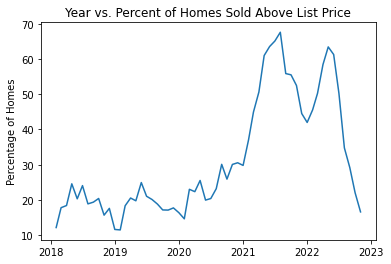

In [7]:
# this one is giving the mean of the counties instead of the sum
above = clean_df.groupby(['date'])['sold_above_list'].mean()
above_df = pd.DataFrame(above)
above_df.reset_index(inplace=True)

plt.plot(above_df['date'], above_df['sold_above_list'])
plt.ylabel('Percentage of Homes')
plt.title('Year vs. Percent of Homes Sold Above List Price')
plt.show()

##I think this is the most accurate of the above graph trials

-----

## DOM graphs

In [8]:
#w = clean_df.loc[(clean_df['region'] == 'Williamson County, TX')]
#h=clean_df.loc[(clean_df['region'] == 'Hays County, TX')]
#b=clean_df.loc[(clean_df['region'] == 'Bastrop County, TX')]
#c=clean_df.loc[(clean_df['region'] == 'Caldwell County, TX')]
#t=clean_df.loc[(clean_df['region'] == 'Travis County, TX')]
#plt.plot(w['date'], w['median_dom'], label = 'Williamson County')
#plt.plot(h['date'], h['median_dom'], label = 'Hays County')
#plt.plot(b['date'], b['median_dom'], label = 'Bastrop County')
#plt.plot(c['date'], c['median_dom'], label = 'Caldwell County')
#plt.plot(t['date'], t['median_dom'], label = 'Travis County')
#plt.legend()

#plt.show()

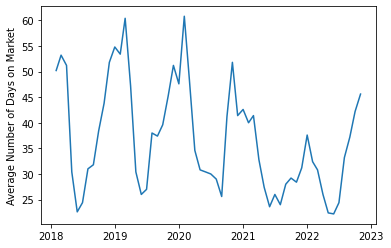

In [9]:
# trying the same with the median sale price
dom = clean_df.groupby(['date'])['median_dom'].mean()
dom_df = pd.DataFrame(dom)
dom_df.reset_index(inplace=True)
dom_df

plt.plot(dom_df['date'], dom_df['median_dom'])
plt.ylabel('Average Number of Days on Market')
plt.show()

-----
## Median Sale Price graphs

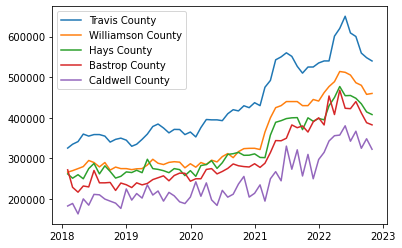

In [10]:
w = clean_df.loc[(clean_df['region'] == 'Williamson County, TX')]
h=clean_df.loc[(clean_df['region'] == 'Hays County, TX')]
b=clean_df.loc[(clean_df['region'] == 'Bastrop County, TX')]
c=clean_df.loc[(clean_df['region'] == 'Caldwell County, TX')]
t=clean_df.loc[(clean_df['region'] == 'Travis County, TX')]
plt.plot(t['date'], t['median_sale_price'], label = 'Travis County')
plt.plot(w['date'], w['median_sale_price'], label = 'Williamson County')
plt.plot(h['date'], h['median_sale_price'], label = 'Hays County')
plt.plot(b['date'], b['median_sale_price'], label = 'Bastrop County')
plt.plot(c['date'], c['median_sale_price'], label = 'Caldwell County')
plt.legend()

plt.show()

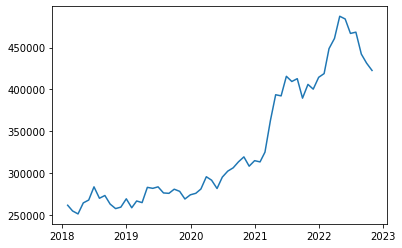

In [11]:
# trying the same with the median sale price
sale_price = clean_df.groupby(['date'])['median_sale_price'].mean()
sale_price_df = pd.DataFrame(sale_price)
sale_price_df.reset_index(inplace=True)
sale_price_df

plt.plot(sale_price_df['date'], sale_price_df['median_sale_price'])
plt.show()


----

## DOM vs. % sold over listing price

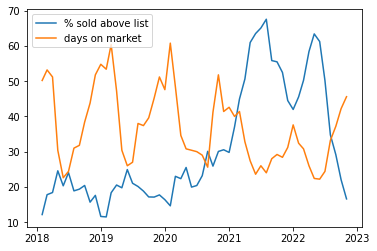

In [12]:
# plotting the percent sold above listing price graph with the median DOM graph to identify possible coorelation
plt.plot(above_df['date'], above_df['sold_above_list'], label='% sold above list')
plt.plot(dom_df['date'], dom_df['median_dom'], label = 'days on market')
plt.legend()
plt.show()

The r-value is: -0.5225123466329074


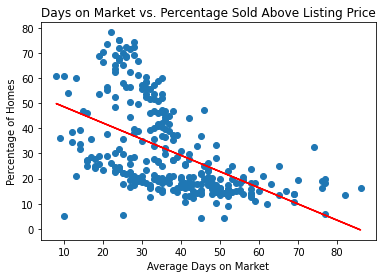

In [13]:
x=clean_df['median_dom']
y=clean_df['sold_above_list']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
#plt.annotate(line_eq, (50,60), fontsize=15,color="red")
plt.xlabel('Average Days on Market')
plt.ylabel('Percentage of Homes')
plt.title('Days on Market vs. Percentage Sold Above Listing Price')
print(f"The r-value is: {rvalue}")
plt.show()

There is a moderate negative coorelation between the number of days on the market and the percentage of homes sold above the listing price. 

In [14]:
combined_df = above_df
combined_df['median_dom'] = dom_df['median_dom']
combined_df['median_sale_price'] = sale_price_df['median_sale_price']
combined_df.describe()

,sold_above_list,median_dom,median_sale_price
count,58.000000,58.000000,58.000000
mean,31.228379,36.889655,331472.139655
std,16.659415,10.536298,73908.239635
min,11.482000,22.200000,251400.000000
25%,18.825500,28.550000,273581.400000
50%,23.622000,33.900000,295531.400000
75%,44.823500,44.850000,404583.825000
max,67.580000,60.800000,487339.000000
